# **TITLE:HOUSE GRADE PREDICTION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import required libraries

In [ ]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import minmax_scale,StandardScaler
from sklearn.model_selection import train_test_split


# evaluation imports

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics, tree
%matplotlib inline

#For warnings
import warnings
warnings.simplefilter(action='ignore')

# **Loading the Data**

In [ ]:
#Read the Data 
house_data=pd.read_csv('/content/drive/MyDrive/ML/Data/Project2_Classification_HouseGrade_Data_Project.csv')
house_data.head(2)

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D


# **Overview of Dataset**

In [ ]:
#Structure of dataset
print('Dimensions: {} Rows and {} Columns '.format(house_data.shape[0], house_data.shape[1]))

Dimensions: 3000 Rows and 14 Columns 


In [ ]:
#datainfo
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [ ]:
# Description of dataset
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


**Observations:**
 * The mean values are in different scale so, we have to scale the data.

In [ ]:
#Finding for categoty columns
house_data.describe(include='object')

,roof,Grade
count,3000,3000
unique,2,5
top,YES,D
freq,1543,1270


In [ ]:
#Finding the missing values
house_data.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [ ]:
house_data

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


# **Exploratory Data Analysis**

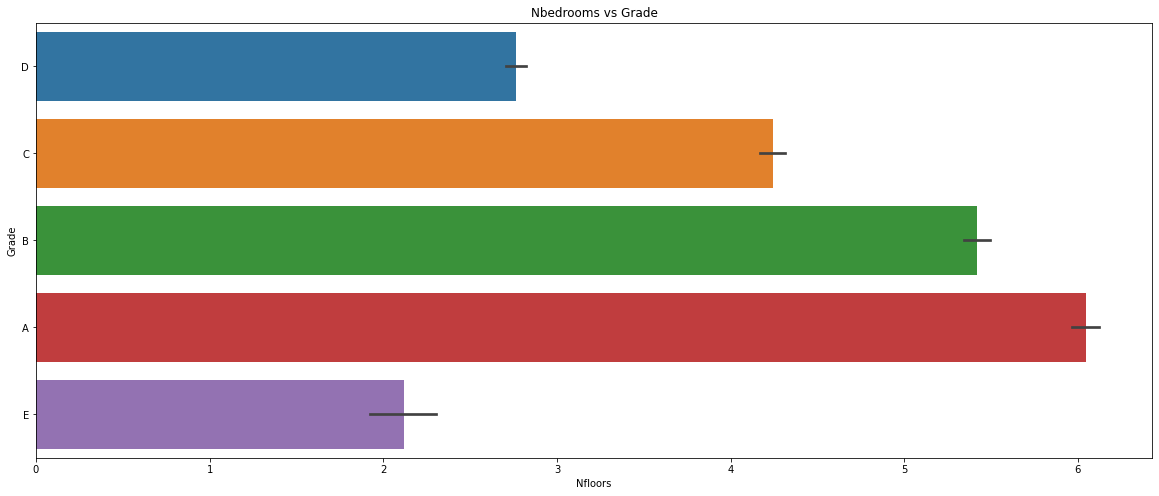

In [ ]:
#  Nbedrooms vs Grade
# Finding which item has more sales

plt.figure(figsize = (20, 8))
sns.barplot(x = 'Nfloors', y = 'Grade', data = house_data)

plt.title("Nbedrooms vs Grade")
plt.show()

**Observations:**
* From the visualization we can say that 6Floors with grade A is high.

In [ ]:
house_data.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

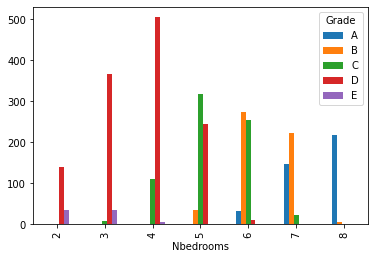

In [ ]:
pd.crosstab(house_data['Nbedrooms'],house_data['Grade']).plot(kind='bar')
plt.show()

* Grade D with bedrooms4 has high count when compared with other values.

In [ ]:
house_data.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [ ]:
#converting non-numeric labeled columns to categorical columns
col_cat=list(house_data.select_dtypes('object'))
for col in col_cat:
  house_data[col]=house_data[col].astype('category')

In [ ]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for roof
house_data['roof'] = le.fit_transform(house_data['roof'])

# label encoding for Grade
house_data['Grade'] = le.fit_transform(house_data['Grade'])

In [ ]:
house_data.dtypes

Id                int64
Area(total)       int64
Trooms            int64
Nbedrooms         int64
Nbwashrooms       int64
Twashrooms        int64
roof              int64
Roof(Area)        int64
Lawn(Area)        int64
Nfloors           int64
API               int64
ANB               int64
Expected price    int64
Grade             int64
dtype: object

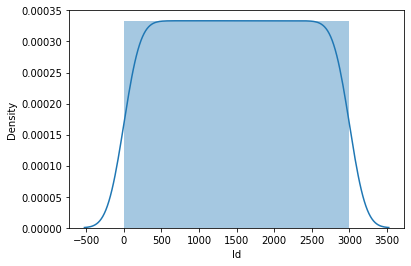

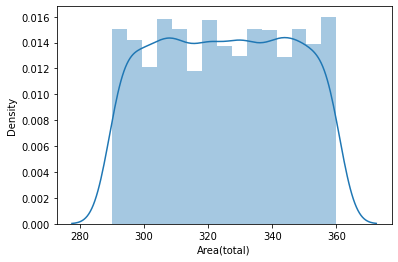

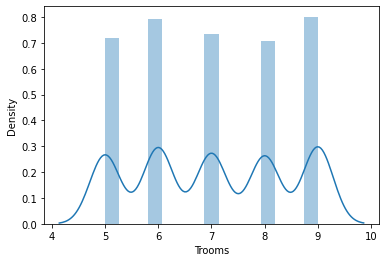

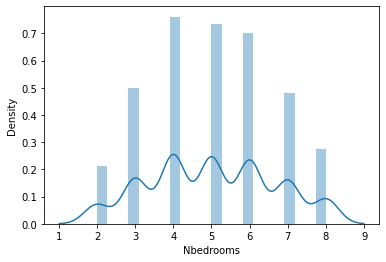

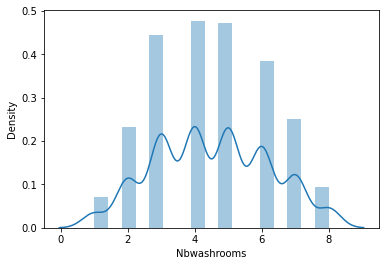

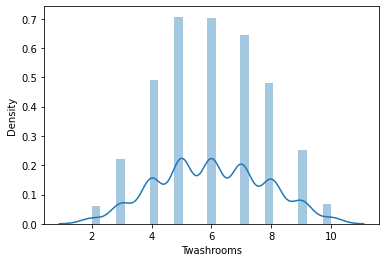

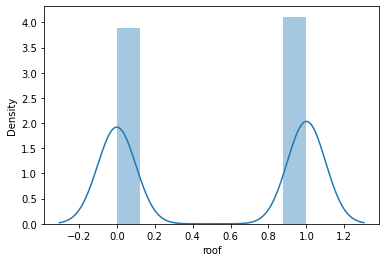

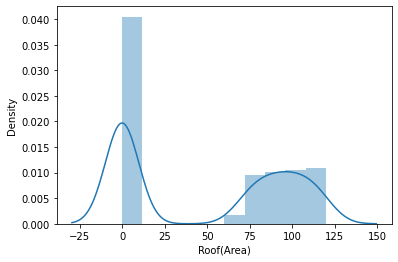

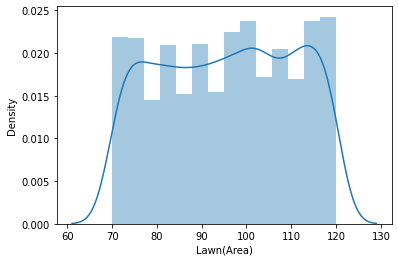

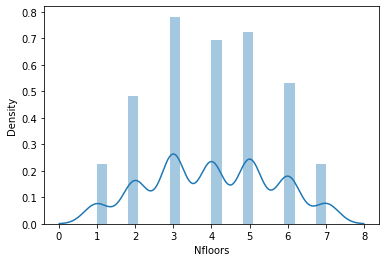

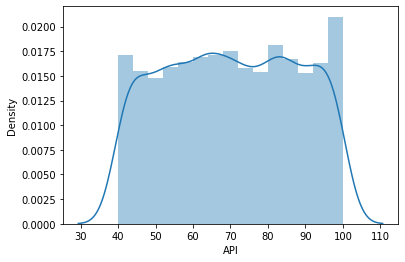

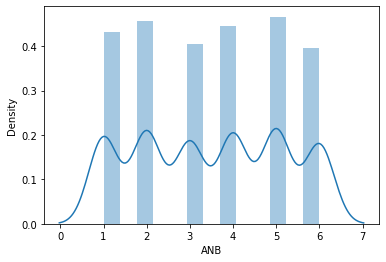

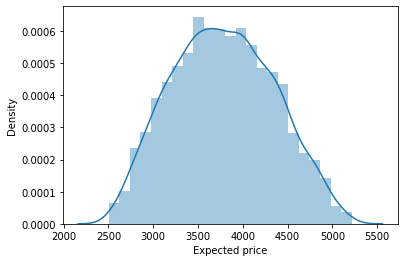

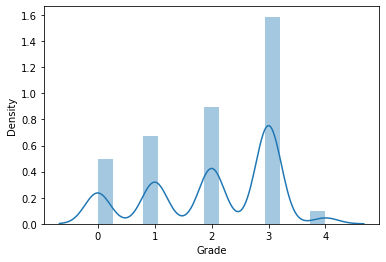

In [ ]:
for i,col in enumerate(house_data.columns):
  plt.figure(i)
  sns.distplot(house_data[col])
# plt.show()

From the visualizations area,lawn,Expected price are normally distributed.

**Features selection**





In [ ]:
col=['Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price' ]

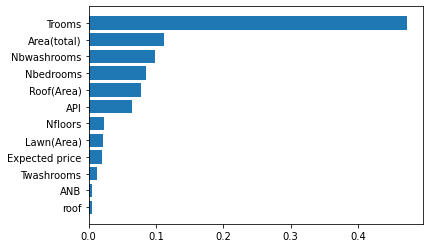

In [ ]:
imp=dc_model.feature_importances_
id=np.argsort(imp)
plt.barh(range(len(id)),imp[id])
plt.yticks(range(len(id)),[col[i] for i in id])
plt.show()

# Observations:
**Trooms,Area,Nbwashrooms are most important features.**

# **Scaling the data**

In [ ]:
house_data.drop(columns='Id',inplace=True)

In [ ]:
house_data1=house_data.drop(columns=['Grade'])

In [ ]:
house_data1

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,339,6,5,4,6,0,0,76,2,79,6,3481
1,358,5,4,3,4,1,71,96,3,72,4,3510
2,324,7,5,4,5,1,101,117,5,64,3,3748
3,330,6,4,3,5,1,101,82,2,59,2,3134
4,320,7,4,4,5,0,0,75,3,40,1,3843
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,341,9,6,5,7,1,95,115,5,90,2,4246
2996,292,9,8,7,8,1,116,87,7,97,4,3753
2997,328,7,4,3,5,0,0,78,5,95,6,3607
2998,293,9,7,7,8,0,0,78,7,51,3,4198


In [ ]:
# As the mean values are in different range scaling the data to get them in same range
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(house_data1)

In [ ]:
house_data1.columns

Index(['Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price'],
      dtype='object')

In [ ]:
house_data2=pd.DataFrame(df_scaled)
house_data2.columns=[ 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price' ]

In [ ]:
house_data2

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.029090,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429
1,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.971733,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292
2,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,0.971733,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609
3,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,0.971733,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319
4,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.029090,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.774617,1.392227,0.597712,0.283580,0.553988,0.971733,0.944209,1.307097,0.608580,1.128060,-0.873093,0.816550
2996,-1.615123,1.392227,1.821279,1.449776,1.113949,0.971733,1.375079,-0.580343,1.842187,1.526681,0.307560,-0.052792
2997,0.140604,-0.015248,-0.625854,-0.882616,-0.565934,-1.029090,-1.004968,-1.187019,0.608580,1.412789,1.488214,-0.310245
2998,-1.566353,1.392227,1.209496,1.449776,1.113949,-1.029090,-1.004968,-1.187019,1.842187,-1.092829,-0.282766,0.731908


In [ ]:
house_data2.columns

Index(['Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price'],
      dtype='object')

In [ ]:
#Selecting Independent (Features) & Dependent(Target) variables

X = house_data2
y = house_data['Grade']




In [ ]:
X

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.029090,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429
1,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.971733,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292
2,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,0.971733,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609
3,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,0.971733,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319
4,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.029090,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.774617,1.392227,0.597712,0.283580,0.553988,0.971733,0.944209,1.307097,0.608580,1.128060,-0.873093,0.816550
2996,-1.615123,1.392227,1.821279,1.449776,1.113949,0.971733,1.375079,-0.580343,1.842187,1.526681,0.307560,-0.052792
2997,0.140604,-0.015248,-0.625854,-0.882616,-0.565934,-1.029090,-1.004968,-1.187019,0.608580,1.412789,1.488214,-0.310245
2998,-1.566353,1.392227,1.209496,1.449776,1.113949,-1.029090,-1.004968,-1.187019,1.842187,-1.092829,-0.282766,0.731908


In [ ]:
y

0       3
1       3
2       2
3       3
4       3
       ..
2995    1
2996    0
2997    3
2998    1
2999    2
Name: Grade, Length: 3000, dtype: int64

# **Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 12)
(600, 12)
(2400,)
(600,)


# **Model Building**

# **Model 1:Logistic Regression** 

In [ ]:
#Creating the model
log_model= LogisticRegression()
#Fitting the training dataset to model
y_score=log_model.fit(X_train,y_train).predict_proba(X_test)

In [ ]:
#using the train model to predict the outcome of x_test dataset
y_pred_train=log_model.predict(X_train)
y_pred=log_model.predict(X_test)

In [ ]:
#Calculating the accuracy of the training dataset
#score
log_model.score(X_train, y_train)

0.9620833333333333

In [ ]:
#Calculating the accuracy of the testing dataset
#score
log_model.score(X_test, y_test)

0.9666666666666667

In [ ]:
# indicates the value of the slope of each parameter 
log_model.intercept_

array([-13.52836942,   2.4597404 ,   9.3644407 ,   7.2457706 ,
        -5.54158228])

# **Model Evulation**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[ 88,   2,   0,   0,   0],
       [  1, 116,   3,   0,   0],
       [  0,   1, 129,   8,   0],
       [  0,   0,   3, 234,   1],
       [  0,   0,   0,   1,  13]])

In [ ]:
print("Accuracy Score on training set : ", metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy Score on test set : ", metrics.accuracy_score(y_test, y_pred))
print("-------------------------------------------------------------")
print("Recall on training set : ", metrics.recall_score(y_train, y_pred_train,average='weighted'))
print("Recall on test set : ", metrics.recall_score(y_test, y_pred,average='weighted'))

print("-------------------------------------------------------------")
print("F1 Score on training set : ", metrics.f1_score(y_train, y_pred_train,average='weighted'))
print("F1 Score on test set : ", metrics.f1_score(y_test, y_pred,average='weighted'))
print("-------------------------------------------------------------")
print("Precision Score on training set : ", metrics.precision_score(y_train, y_pred_train,average='weighted'))
print("Precision Score on test set : ", metrics.precision_score(y_test, y_pred,average='weighted'))

Accuracy Score on training set :  0.9620833333333333
Accuracy Score on test set :  0.9666666666666667
-------------------------------------------------------------
Recall on training set :  0.9620833333333333
Recall on test set :  0.9666666666666667
-------------------------------------------------------------
F1 Score on training set :  0.9616976019045542
F1 Score on test set :  0.9666035429090288
-------------------------------------------------------------
Precision Score on training set :  0.9620517880892182
Precision Score on test set :  0.9666923430212702


In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.97      0.97      0.97       120
           2       0.96      0.93      0.95       138
           3       0.96      0.98      0.97       238
           4       0.93      0.93      0.93        14

    accuracy                           0.97       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.97      0.97      0.97       600



# **ROC and AUC**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)





(600, 5)

In [ ]:
label_binarizer.transform([0])


array([[1, 0, 0, 0, 0]])

In [ ]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

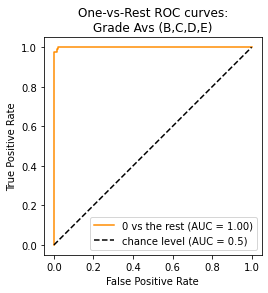

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nGrade Avs (B,C,D,E)")
plt.legend()
plt.show()

** ROC curve for Grade A**

In [ ]:
label_binarizer.transform([1])


array([[0, 1, 0, 0, 0]])

In [ ]:
class_of_interest = 1
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

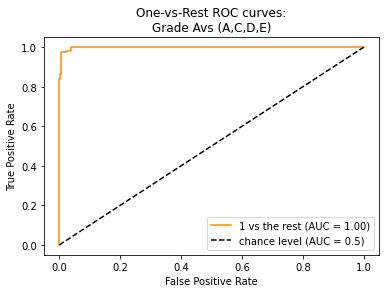

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
# plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nGrade Avs (A,C,D,E)")
plt.legend()
plt.show()

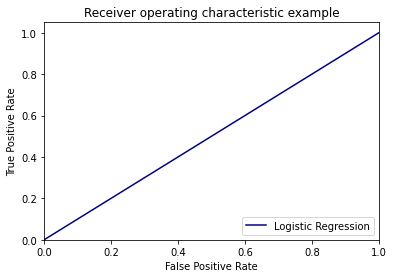

In [ ]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt


def plot_roc(y_test, y_score):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Compute micro-average ROC curve and ROC area
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', label='Logistic Regression') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
# plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
# "chance level (AUC = 0.8)"


# **Interpetation:**
**Accuracy of the logistic regression model is 96%**

# **MOdel 2:Naive Bayes**

In [ ]:
#Creating the model
nb_model=GaussianNB()
score1=nb_model.fit(X_train,y_train)

In [ ]:
#using the train model to predict the outcome of x_test dataset
y_pred_train2 = nb_model.predict(X_train)
y_pred2 = nb_model.predict(X_test)



In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred2)
cm

array([[ 77,  13,   0,   0,   0],
       [  9,  96,  15,   0,   0],
       [  0,  22, 100,  16,   0],
       [  0,   0,  32, 191,  15],
       [  0,   0,   0,   3,  11]])

# **Model Evulation**

In [ ]:
print("Accuracy Score on training set : ", metrics.accuracy_score(y_train, y_pred_train2))
print("Accuracy Score on test set : ", metrics.accuracy_score(y_test, y_pred2))
print("-------------------------------------------------------------")
print("Recall on training set : ", metrics.recall_score(y_train, y_pred_train2,average='weighted'))
print("Recall on test set : ", metrics.recall_score(y_test, y_pred2,average='weighted'))

print("-------------------------------------------------------------")
print("F1 Score on training set : ", metrics.f1_score(y_train, y_pred_train2,average='weighted'))
print("F1 Score on test set : ", metrics.f1_score(y_test, y_pred2,average='weighted'))
print("-------------------------------------------------------------")
print("Precision Score on training set : ", metrics.precision_score(y_train, y_pred_train2,average='weighted'))
print("Precision Score on test set : ", metrics.precision_score(y_test, y_pred2,average='weighted'))

Accuracy Score on training set :  0.8045833333333333
Accuracy Score on test set :  0.7916666666666666
-------------------------------------------------------------
Recall on training set :  0.8045833333333333
Recall on test set :  0.7916666666666666
-------------------------------------------------------------
F1 Score on training set :  0.808000348255721
F1 Score on test set :  0.7967040565806948
-------------------------------------------------------------
Precision Score on training set :  0.8157417627220832
Precision Score on test set :  0.8079793687611648


# **Interpetation:**
**Accuracy score for Naive Bayers is 79%**

# **Model 3:Decision Trees**

In [ ]:
#Creating the model
dc_model = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10)}
# Run the grid search
grid_obj = GridSearchCV(dc_model, param_grid=parameters,scoring='accuracy', cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dc_model = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dc_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [ ]:
#using the train model to predict the outcome of x_test dataset
y_pred_train3= dc_model.predict(X_train)
y_pred3 = dc_model.predict(X_test)

In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred2)
cm

array([[ 77,  13,   0,   0,   0],
       [  9,  96,  15,   0,   0],
       [  0,  22, 100,  16,   0],
       [  0,   0,  32, 191,  15],
       [  0,   0,   0,   3,  11]])

# **Model Evulation**

In [ ]:
print("Accuracy Score on training set : ", metrics.accuracy_score(y_train, y_pred_train3))
print("Accuracy Score on test set : ", metrics.accuracy_score(y_test, y_pred3))
print("-------------------------------------------------------------")
print("Recall on training set : ", metrics.recall_score(y_train, y_pred_train3,average='weighted'))
print("Recall on test set : ", metrics.recall_score(y_test, y_pred3,average='weighted'))

print("-------------------------------------------------------------")
print("F1 Score on training set : ", metrics.f1_score(y_train, y_pred_train3,average='weighted'))
print("F1 Score on test set : ", metrics.f1_score(y_test, y_pred3,average='weighted'))
print("-------------------------------------------------------------")
print("Precision Score on training set : ", metrics.precision_score(y_train, y_pred_train3,average='weighted'))
print("Precision Score on test set : ", metrics.precision_score(y_test, y_pred3,average='weighted'))

Accuracy Score on training set :  0.9533333333333334
Accuracy Score on test set :  0.865
-------------------------------------------------------------
Recall on training set :  0.9533333333333334
Recall on test set :  0.865
-------------------------------------------------------------
F1 Score on training set :  0.9532050960406879
F1 Score on test set :  0.864954931241731
-------------------------------------------------------------
Precision Score on training set :  0.9531235033541312
Precision Score on test set :  0.8653937675658612


In [ ]:
feature_names = list(X.columns)
print(feature_names)

['Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms', 'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Expected price']


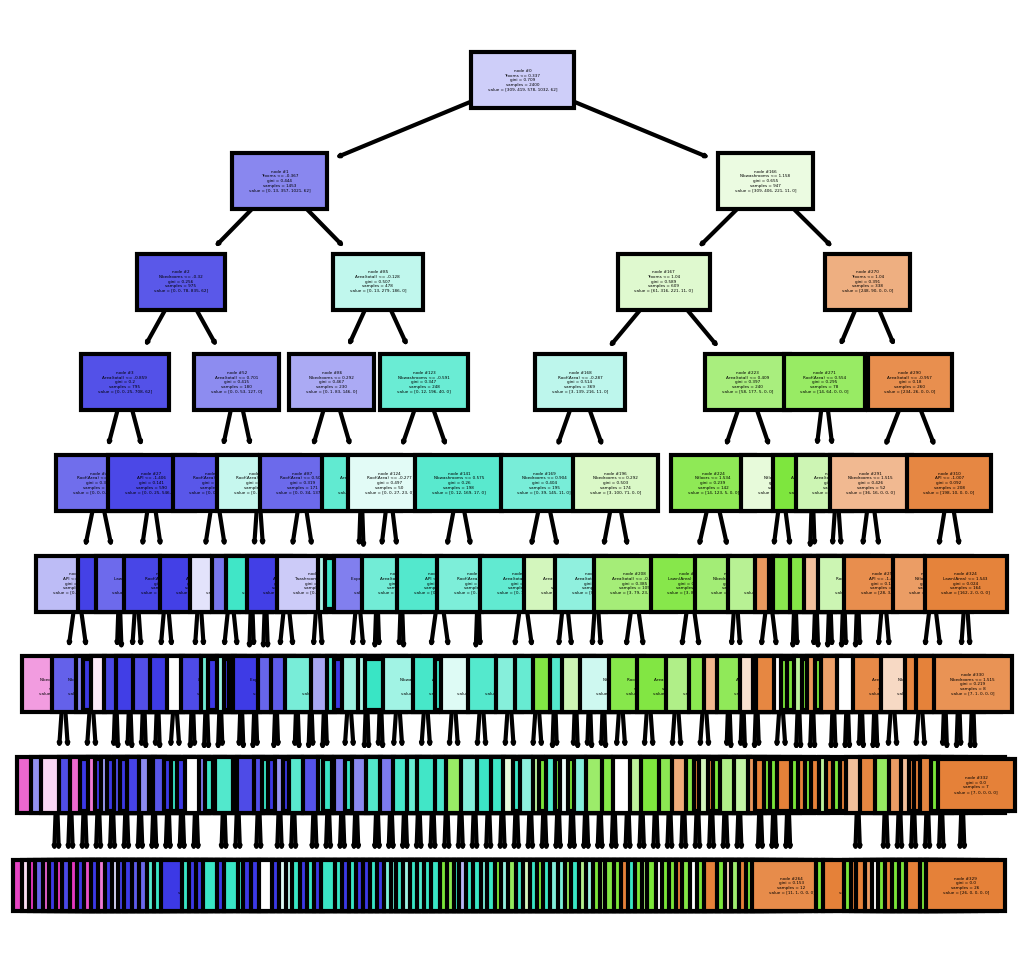

In [ ]:
# plt.figure(figsize=(10, 10))
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dc_model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=1,
                     node_ids=True,
                     class_names=None)
plt.show()


# **Interpetation:**
**Accuracy score for Decision tree is 86%**

# **Model 4:Random Forest**

In [ ]:
#Creating the model
rf_model = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [100, 500],'max_depth': np.arange(1,10)}
            

In [ ]:
# Run the grid search
grid_obj = GridSearchCV(rf_model, param_grid=parameters,scoring='accuracy', cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_model = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=1)

In [ ]:
#using the train model to predict the outcome of x_test dataset
y_pred_train4= rf_model.predict(X_train)
y_pred4 = rf_model.predict(X_test)

In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred4)
cm

array([[ 80,  10,   0,   0,   0],
       [  5, 102,  13,   0,   0],
       [  0,   4, 119,  15,   0],
       [  0,   0,   8, 230,   0],
       [  0,   0,   0,  12,   2]])

# **Model Evulation**

In [ ]:
print("Accuracy Score on training set : ", metrics.accuracy_score(y_train, y_pred_train4))
print("Accuracy Score on test set : ", metrics.accuracy_score(y_test, y_pred4))
print("-------------------------------------------------------------")
print("Recall on training set : ", metrics.recall_score(y_train, y_pred_train4,average='weighted'))
print("Recall on test set : ", metrics.recall_score(y_test, y_pred4,average='weighted'))

print("-------------------------------------------------------------")
print("F1 Score on training set : ", metrics.f1_score(y_train, y_pred_train4,average='weighted'))
print("F1 Score on test set : ", metrics.f1_score(y_test, y_pred4,average='weighted'))
print("-------------------------------------------------------------")
print("Precision Score on training set : ", metrics.precision_score(y_train, y_pred_train4,average='weighted'))
print("Precision Score on test set : ", metrics.precision_score(y_test, y_pred4,average='weighted'))

Accuracy Score on training set :  0.9833333333333333
Accuracy Score on test set :  0.8883333333333333
-------------------------------------------------------------
Recall on training set :  0.9833333333333333
Recall on test set :  0.8883333333333333
-------------------------------------------------------------
F1 Score on training set :  0.9828192902138092
F1 Score on test set :  0.8813835498480663
-------------------------------------------------------------
Precision Score on training set :  0.9836380201882498
Precision Score on test set :  0.8908653878027798


# Interpetation:
**Accuracy score for Random Tree Forest is 88%**

# **Model 5: KNN**

In [ ]:
#Creating the model
knn_model = KNeighborsClassifier()
k_range = list(range(1, 21))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=20)
# Fit the best algorithm to the data. 
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
#using the train model to predict the outcome of x_test dataset
y_pred_train5= knn_model.predict(X_train)
y_pred5 = knn_model.predict(X_test)

In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred5)
cm

array([[ 81,   9,   0,   0,   0],
       [  9, 102,   9,   0,   0],
       [  0,   7, 118,  13,   0],
       [  0,   0,   7, 230,   1],
       [  0,   0,   0,   6,   8]])

# **Model Evulation**



In [ ]:
print("Accuracy Score on training set : ", metrics.accuracy_score(y_train, y_pred_train5))
print("Accuracy Score on test set : ", metrics.accuracy_score(y_test, y_pred5))
print("-------------------------------------------------------------")
print("Recall on training set : ", metrics.recall_score(y_train, y_pred_train5,average='weighted'))
print("Recall on test set : ", metrics.recall_score(y_test, y_pred5,average='weighted'))

print("-------------------------------------------------------------")
print("F1 Score on training set : ", metrics.f1_score(y_train, y_pred_train5,average='weighted'))
print("F1 Score on test set : ", metrics.f1_score(y_test, y_pred5,average='weighted'))
print("-------------------------------------------------------------")
print("Precision Score on training set : ", metrics.precision_score(y_train, y_pred_train5,average='weighted'))
print("Precision Score on test set : ", metrics.precision_score(y_test, y_pred5,average='weighted'))

Accuracy Score on training set :  0.9041666666666667
Accuracy Score on test set :  0.8983333333333333
-------------------------------------------------------------
Recall on training set :  0.9041666666666667
Recall on test set :  0.8983333333333333
-------------------------------------------------------------
F1 Score on training set :  0.9012434637694184
F1 Score on test set :  0.8968941592349825
-------------------------------------------------------------
Precision Score on training set :  0.9044965206076785
Precision Score on test set :  0.8975583391553115



**Accuracy score for KNN model is 89%**

# Interpetation
**Calculated all the models accuracy score and comparing all the models accuracy score the logistic regression model has high value it is about 96%**